In [1]:
# Function Analysis in Python
# This notebook allows you to analyze a mathematical function at a specific point.


In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def is_valid_function(func, sym, pt):
    try:
        func_at_pt = func.subs(sym, pt)
        return sp.simplify(func_at_pt).is_real
    except (sp.PoleError, sp.ComplexInfinity):
        return False

def is_function_defined_at_point(func, sym, pt):
    try:
        limit = sp.limit(func, sym, pt)
        return limit.is_real
    except (sp.PoleError, sp.ComplexInfinity):
        return False


In [4]:
# User Input
#In this section, you will enter the function and point for analysis.


Enter a function: 2*x
Enter a point: 2
Table of Values:
x = 0.00, y = 0.00
x = 0.04, y = 0.08
x = 0.08, y = 0.16
x = 0.12, y = 0.24
x = 0.16, y = 0.32
x = 0.20, y = 0.40
x = 0.24, y = 0.48
x = 0.28, y = 0.57
x = 0.32, y = 0.65
x = 0.36, y = 0.73
x = 0.40, y = 0.81
x = 0.44, y = 0.89
x = 0.48, y = 0.97
x = 0.53, y = 1.05
x = 0.57, y = 1.13
x = 0.61, y = 1.21
x = 0.65, y = 1.29
x = 0.69, y = 1.37
x = 0.73, y = 1.45
x = 0.77, y = 1.54
x = 0.81, y = 1.62
x = 0.85, y = 1.70
x = 0.89, y = 1.78
x = 0.93, y = 1.86
x = 0.97, y = 1.94
x = 1.01, y = 2.02
x = 1.05, y = 2.10
x = 1.09, y = 2.18
x = 1.13, y = 2.26
x = 1.17, y = 2.34
x = 1.21, y = 2.42
x = 1.25, y = 2.51
x = 1.29, y = 2.59
x = 1.33, y = 2.67
x = 1.37, y = 2.75
x = 1.41, y = 2.83
x = 1.45, y = 2.91
x = 1.49, y = 2.99
x = 1.54, y = 3.07
x = 1.58, y = 3.15
x = 1.62, y = 3.23
x = 1.66, y = 3.31
x = 1.70, y = 3.39
x = 1.74, y = 3.47
x = 1.78, y = 3.56
x = 1.82, y = 3.64
x = 1.86, y = 3.72
x = 1.90, y = 3.80
x = 1.94, y = 3.88
x = 1.98, y =

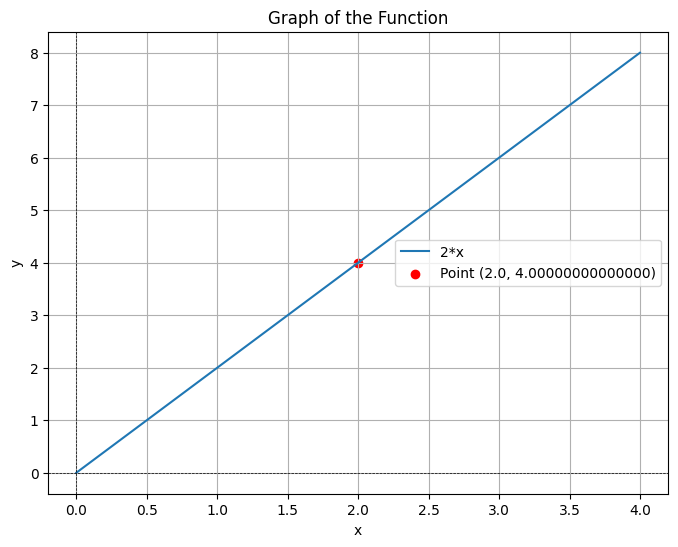

Limit from the left at x=2.0: 4.00000000000000
Limit from the right at x=2.0: 4.00000000000000


In [5]:
try:
    # Input: Function String and Point
    function_str = input("Enter a function: ")

    # Check if the input function is valid
    if not function_str:
        raise ValueError("Error: Function string cannot be empty")

    point_str = input("Enter a point: ")

    # Check if the input point is valid
    if not point_str:
        raise ValueError("Error: Point cannot be empty")
    
    try:
        point = float(point_str)
    except ValueError:
        raise ValueError("Error: Invalid point input. Please enter a valid numeric value.")

    # Code Cell 6: Parsing the Function String
    # Step 1: Parsing the Function String and Creating a Function
    x = sp.symbols('x')
    parsed_function = sp.sympify(function_str)

    # Code Cell 7: Checking Function Validity at the Point
    # Check if the function is defined at the point
    if is_valid_function(parsed_function, x, point):
        # Code Cell 8: Creating a Table of Values
        # Task 1: Create a Table of Values Around the Point
        x_values = np.linspace(point - 2, point + 2, 100)  # Adjust the range as needed
        y_values = [parsed_function.subs(x, val) for val in x_values]
    
        # Display the table of values
        table = list(zip(x_values, y_values))
        print("Table of Values:")
        for x_val, y_val in table:
            print(f'x = {x_val:.2f}, y = {y_val:.2f}')
    
        # Code Cell 9: Plotting the Graph
        # Task 2: Plot the Graph of the Function Around the Point
        plt.figure(figsize=(8, 6))
        plt.plot(x_values, y_values, label=f'{function_str}')
        plt.scatter([point], [parsed_function.subs(x, point)], color='red', label=f'Point ({point}, {parsed_function.subs(x, point)})', marker='o')
        plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
        plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Graph of the Function')
        plt.legend()
        plt.grid(True)
        plt.show()
    
        # Code Cell 10: Finding Limits
        # Task 3: Find the Limit from the Left and Right
        limit_left = sp.limit(parsed_function, x, point, dir='-')
        limit_right = sp.limit(parsed_function, x, point, dir='+')
    
        print(f'Limit from the left at x={point}: {limit_left}')
        print(f'Limit from the right at x={point}: {limit_right}')
    
    else:
        if 'ln' in function_str and point <= 0:
            print("Error: Natural logarithm (ln(x)) is only defined for x > 0.")
        elif 'sqrt' in function_str and point < 0:
            print("Error: Square root (sqrt(x)) is not defined for negative x values.")
        elif '1/' in function_str and point == 0:
            print("Error: Reciprocal function (1/x) is not defined at x = 0.")
        elif 'tan' in function_str and (point % (sp.pi/2)) == 0:
            print("Error: Tangent function (tan(x)) has vertical asymptotes at odd multiples of π/2.")
        elif 'csc' in function_str and (point % sp.pi) == 0:
            print("Error: Cosecant function (csc(x)) has vertical asymptotes at multiples of π.")
        elif 'sec' in function_str and (point % (sp.pi/2)) == 0:
            print("Error: Secant function (sec(x)) has vertical asymptotes at odd multiples of π/2.")
        elif 'cot' in function_str and (point % sp.pi) == 0:
            print("Error: Cotangent function (cot(x)) has vertical asymptotes at multiples of π.")
        else:
            print("Error: The function is not defined at the given point.")
        
except (sp.SympifyError, ValueError) as e:
    print(f"Error: {e}")
except ZeroDivisionError:
    print("Error: Division by zero when calculating the limit.")
except KeyboardInterrupt:
    print("Operation interrupted by the user.")
except (OverflowError, MemoryError):
    print("Error: Overflow or memory error occurred. The calculation is too complex.")
except SyntaxError:
    print("Error: Invalid function syntax. Please enter a valid mathematical expression.")
except FileNotFoundError:
    print("Error: The specified file was not found.")
except IOError:
    print("Error: Input/output error.")
except AssertionError as e:
    print(f"Assertion failed: {e}")
except IndexError:
    print("Error: Index out of range.")
except KeyError:
    print("Error: Key not found in dictionary.")
except AttributeError:
    print("Error: Attribute not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
